In [ ]:
#import libraries

In [7]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
#import test image first

In [9]:
img = cv2.imread('./testing/tester.jpg')
img.shape

(501, 380, 3)

In [10]:
#plot image for refrence 

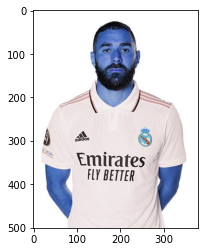

In [11]:
plt.imshow(img)

In [12]:
#converting the image from BGR to Grayscale 

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(501, 380)

In [14]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [15]:
#plotting the gray image for refrence

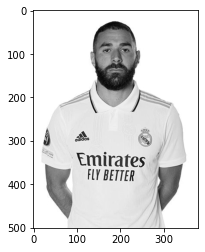

In [16]:
plt.imshow(gray, cmap='gray')

In [17]:
#assigning face and eye cascades from haarcascades (openCV)

In [18]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[133,  46, 117, 117]])

In [19]:
#storing co ordinates in array

In [20]:
(x,y,w,h) = faces[0]
x,y,w,h

(133, 46, 117, 117)

In [21]:
#plotting rectangle first to detect face 

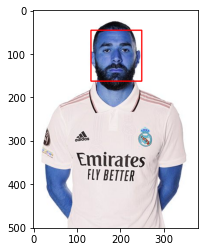

In [22]:
face_outline = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_outline)

In [23]:
#wrtiing a function to iterate faces and find region of color and apply eye cascade 

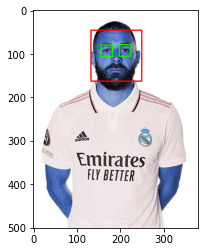

In [24]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_outline = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_area = face_outline[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_area,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_outline, cmap='gray')
plt.show()

In [25]:
#plotting region of interest

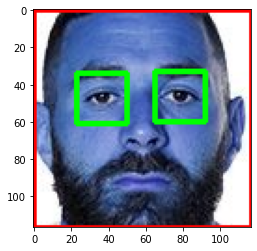

In [26]:
%matplotlib inline
plt.imshow(roi_area, cmap='gray')

In [27]:
#writing a function for everything above ,this function reads the image,converts it to grayscale,apply face cascasde and then
#eyecascade. if more than 2 eyes are detected then region of interest is returned 

In [28]:
def image_cropper(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_area = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_area

In [29]:
#call orignal image to test above function

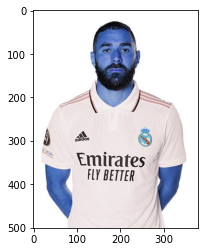

In [30]:
original_image = cv2.imread('./testing/tester.jpg')
plt.imshow(original_image)

In [31]:
#now to see if function returns region of interest 

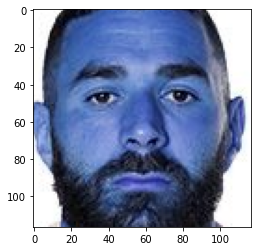

In [32]:
cropped_image = image_cropper('./testing/tester.jpg')
plt.imshow(cropped_image)

In [33]:
#let us run the above funtion on a image where 2 eyes are not present

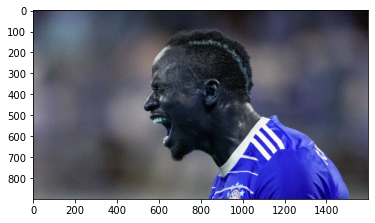

In [34]:
no_eyes_image = cv2.imread('./testing/noeye.jpg')
plt.imshow(no_eyes_image)

In [35]:
#we get none output

In [36]:
cropped_image_no_2_eyes = image_cropper('./testing/noeye.jpg')
cropped_image_no_2_eyes
print(cropped_image_no_2_eyes)

None


In [37]:
#initialize variables (end goal is to store cropped images in cropped folder)

In [38]:
path_to_data = "./dataset/"
path_to_cropped_data = "./dataset/cropped/"

In [39]:
#storing all individual subfolder paths in a python list

In [40]:
import os
img_directories = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_directories.append(entry.path)

In [41]:
#verification

In [42]:
img_directories

['./dataset/cristiano_ronaldo',
 './dataset/karim_benzema',
 './dataset/kevin_de_bruyne',
 './dataset/lionel_messi',
 './dataset/mohamed_salah',
 './dataset/robert_lewandowski',
 './dataset/sadio_mane']

In [43]:
#if cropped folder does not exits this will create the folder 

In [44]:
import shutil
if os.path.exists(path_to_cropped_data):
     shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [45]:
cropped_image_directories = []
bdr_ppl_dict = {}

for img_dir in img_directories:
    count = 1
    player_name = img_dir.split('/')[-1]
    print(player_name)
    
    bdr_ppl_dict[player_name] = []
    
    for entry in os.scandir(img_dir):
        roi_area = image_cropper(entry.path)
        if roi_area is not None:
            cropped_folder = path_to_cropped_data + player_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_directories.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = player_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_area)
            bdr_ppl_dict[player_name].append(cropped_file_path)
            count += 1    

cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/cristiano_ronaldo
karim_benzema
Generating cropped images in folder:  ./dataset/cropped/karim_benzema
kevin_de_bruyne
Generating cropped images in folder:  ./dataset/cropped/kevin_de_bruyne
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
mohamed_salah
Generating cropped images in folder:  ./dataset/cropped/mohamed_salah
robert_lewandowski
Generating cropped images in folder:  ./dataset/cropped/robert_lewandowski
sadio_mane
Generating cropped images in folder:  ./dataset/cropped/sadio_mane


In [46]:
#code block for wavelet transformation (stack overflow)

In [47]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [48]:
#plotting wavelet transformed image 

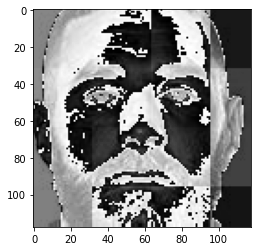

In [49]:
img_trans=w2d(cropped_image,'db1',5)
plt.imshow(img_trans,cmap='gray')

In [50]:
def image_cropper(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_area = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_area

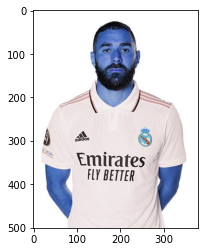

In [51]:
original_image = cv2.imread('./testing/tester.jpg')
plt.imshow(original_image)

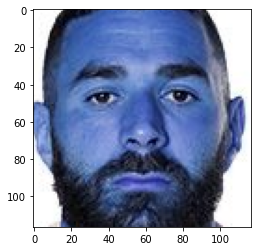

In [52]:
cropped_image = image_cropper('./testing/tester.jpg')
plt.imshow(cropped_image)

In [53]:
#creating a dictionary to assgin values for list Y

In [54]:
player_class={}
count=0
for bdr_name in bdr_ppl_dict.keys():
    player_class[bdr_name]=count
    count=count+1
player_class
    

{'cristiano_ronaldo': 0,
 'karim_benzema': 1,
 'kevin_de_bruyne': 2,
 'lionel_messi': 3,
 'mohamed_salah': 4,
 'robert_lewandowski': 5,
 'sadio_mane': 6}

In [55]:
#stacking original and transformed image 

In [56]:
X=[]
y=[]

for bdr_name,training_files in bdr_ppl_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scaled_org_image=cv2.resize(img,(32,32))
        img_trans=w2d(cropped_image,'db1',5)
        scaled_trans_image=cv2.resize(img_trans,(32,32))
        combined_image = np.vstack((scaled_org_image.reshape(32*32*3,1),scaled_trans_image.reshape(32*32,1)))
        X.append(combined_image)
        y.append(player_class[bdr_name])
        

In [57]:
#32*32*3 + 32*32 stacked combined image 



In [58]:
len(X[0])

4096

In [59]:
#coverting data type to flaot

In [60]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(197, 4096)

In [61]:
#we can start to train our model We will use SVM with linear kernel and c=1

In [62]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 1))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.66

In [73]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.75      0.75      0.75         4
           2       0.50      0.67      0.57         6
           3       0.83      0.50      0.62        10
           4       0.75      0.75      0.75         8
           5       0.64      0.82      0.72        11
           6       0.00      0.00      0.00         1

    accuracy                           0.66        50
   macro avg       0.58      0.58      0.57        50
weighted avg       0.67      0.66      0.65        50



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#try different models to get better accuracy 

In [80]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
#using gridsearchcv we will find best model accross diffrent parameters 

In [81]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
#let us find the best estimator for our model 

In [86]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=4, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.707395,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.591592,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.720908,{'logisticregression__C': 1}


In [87]:
best_estimators['svm'].score(X_test,y_test)

0.62

In [88]:
best_estimators['random_forest'].score(X_test,y_test)

0.46

In [89]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.64

In [91]:
best_clf=best_estimators['logistic_regression']

In [ ]:
#plot confsion matrix 

In [92]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[7, 1, 1, 0, 1, 0, 0],
       [0, 3, 0, 1, 0, 0, 0],
       [2, 0, 3, 0, 0, 1, 0],
       [1, 3, 1, 4, 0, 1, 0],
       [1, 2, 0, 0, 5, 0, 0],
       [1, 0, 0, 1, 0, 9, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [ ]:
#beautify confusion matrix 

Text(69.0, 0.5, 'Truth')

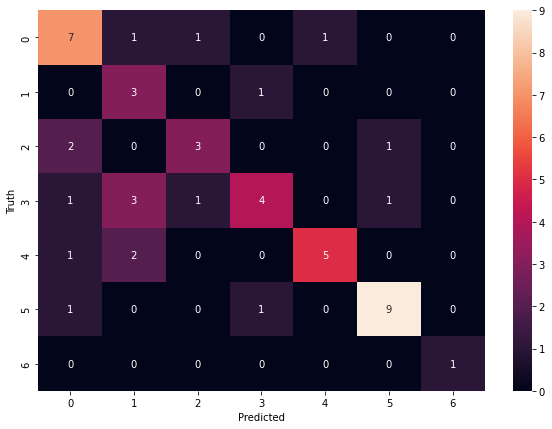

In [93]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [94]:
#save model

In [95]:
import joblib

In [96]:
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [97]:
import json
with open("player_dictionary","w")as f:
    f.write(json.dumps(player_class))